<a href="https://colab.research.google.com/github/farhanzafrani/advanced-computer-vision-in-pytorch/blob/main/Introduction_to_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt

# Inputs and Outputs for the model
x = np.array([[1,1]])
y = np.array([[0]])

############### Activation Functions ###############
def sigmoid(value):
    return 1 / (1 + np.exp(-value))

def relu(value):
    return np.where(value > 0, value, 0)

def tanh(value):
    return (np.exp(value) - np.exp(-value)) / (np.exp(value) + np.exp(-value))

def softmax(value):
    exp_values = np.exp(value - np.max(value))  # for numerical stability
    return exp_values / np.sum(exp_values)

def linear(value):
    return value

################### Loss Functions #################

def mse(pred, out):
    return np.mean(np.square(pred - out))

def ase(pred, out):
    return np.mean(np.abs(pred - out))

def binary_cross_entropy(pred, out, epsilon=1e-12):
    pred = np.clip(pred, epsilon, 1. - epsilon)  # Avoid log(0)
    return -np.mean(out * np.log(pred) + (1 - out) * np.log(1 - pred))

def categorical_cross_entropy(pred, out, epsilon=1e-12):
    pred = np.clip(pred, epsilon, 1. - epsilon)  # Avoid log(0)
    return -np.mean(np.sum(out * np.log(pred)))

################### Feed Forward Propagation ######################
def feedforwardpropagation(inputs, output, weights):
    pre_hid = np.dot(inputs, weights[0]) + weights[1]
    a_act = sigmoid(pre_hid)  # Activation
    pred_out = np.dot(a_act, weights[2]) + weights[3]
    loss = mse(pred_out, output)

    return loss


In [10]:
def update_weights(inputs, outputs, weights, lr):
    temp_weights = deepcopy(weights)
    update_weights = deepcopy(weights)
    original_weights = deepcopy(weights)
    original_loss = feedforwardpropagation(inputs, outputs, weights)
    # Loop through each layer
    for i, layer in enumerate(original_weights):
        for index, weight in np.ndenumerate(layer):
            temp_weights = deepcopy(weights)
            temp_weights[i][index] += 0.0001  # Slightly perturb the weight
            _loss_plus = feedforwardpropagation(inputs, outputs, temp_weights)
            grad = (_loss_plus - original_loss)/0.0001
            update_weights[i][index] -= grad * lr
    return update_weights, original_loss

In [11]:
np.random.seed(42)

W = [
    np.array([[-0.0053, 0.3793],
              [-0.5820, -0.5204],
              [-0.2723, 0.1896]], dtype=np.float32).T,
    np.array([-0.0140, 0.5607, -0.0628], dtype=np.float32),
    np.array([[ 0.1528, -0.1745, -0.1135]], dtype=np.float32).T,
    np.array([-0.5516], dtype=np.float32)
]

W_new = [
    np.random.randn(2, 3).astype(np.float32),
    np.random.randn(3,).astype(np.float32),
    np.random.randn(3,1).astype(np.float32),
    np.random.randn(1,).astype(np.float32)
]

[]

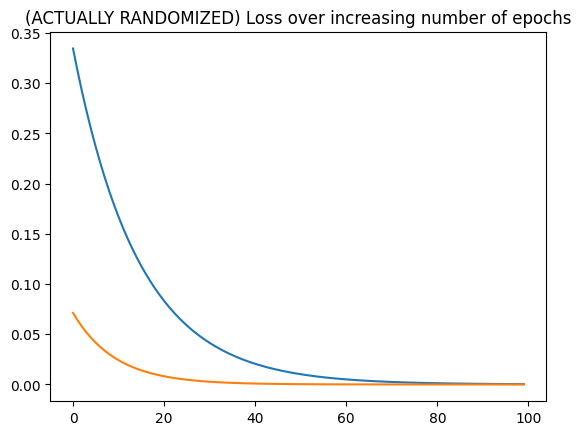

In [12]:
losses = []
losses_new = []
for epoch in range(100):
    W, loss = update_weights(x,y,W,0.01)
    W_new, loss_new = update_weights(x,y,W_new,0.01)
    losses.append(loss)
    losses_new.append(loss_new)

plt.plot(losses)
plt.title('Loss over increasing number of epochs')

plt.plot(losses_new)
plt.title('(ACTUALLY RANDOMIZED) Loss over increasing number of epochs')

plt.plot()